# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1940]:
# Importing packages.
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1941]:
# Loading WeRateDogs data.
wrd_df = pd.read_csv('twitter-archive-enhanced.csv')

In [1942]:
# Verifying data loaded.
wrd_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1943]:
# Downloading the image predictions.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1944]:
# EVERYTHING IS COMMENTED OUT TO SHOW I KNOW HOW TO QUERY DATA USING
# THE TWITTER API. I'M USING THE APPROVED SECOND APPROACH FOR THIS PROJECT.

#from tweepy import OAuthHandler
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = wrd_df.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
# This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [1945]:
# Creating tweet_list from json file.
tweet_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_id = json.loads(line)["id"]
        retweet_count = json.loads(line)["retweet_count"]
        favorite_count = json.loads(line)["favorite_count"]
        dict_object = {"tweet_id": tweet_id, "retweet_count": retweet_count, "favorite_count": favorite_count}
        tweet_list.append(dict_object)

In [1946]:
# Creating retweet dataframe from tweet_list.
retweet_df = pd.DataFrame(tweet_list)
retweet_df.set_index('tweet_id', inplace=True)

In [1947]:
# Verifying the dataframe is correct.
retweet_df.head()

,favorite_count,retweet_count
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [1948]:
wrd_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [1949]:
img_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1950]:
img_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
Cardigan                     19 
web_site                     19 
teddy                        18 
Maltese_dog                  18 
Shetland_sheepdog            18 
Eskimo_dog                   18 
beagle                       18 
Shih-Tzu                     17 
Rottweiler                   17 
Lakeland_terrier             17 
kuvasz                       16 
Italian_greyhound            16 
          

In [1951]:
img_predictions_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Eskimo_dog                        27 
Pembroke                          27 
collie                            27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
chow                              20 
Samoyed                           20 
toy_terrier                       20 
miniature_pinscher                20 
malinois                          20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [1952]:
img_predictions_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [1953]:
retweet_df.head(10)

,favorite_count,retweet_count
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774
891087950875897856,20562,3261
890971913173991426,12041,2158
890729181411237888,56848,16716
890609185150312448,28226,4429


In [1954]:
wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1955]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1956]:
retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [1957]:
wrd_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

### Quality issues
**1. Img_prediction_df columns not very descriptive.**<br>
(p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

**2. Lower and uppercase dog names in img_predictions.**

**3. Unneeded columns in wrd_df...**
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- doggo
- floofer
- pupper
- puppo

**4. Incorrect data types.**
- Timestamp should be datetime data type not an object.
- Tweet_id should be object data type not integer.
- Rating_numerator and rating_denominator should be float data type not integer.
- Favorite_count should be integer data type not float.

**5. Removing tweets that are not dogs from img_predictions_df.**

**6. Reducing the string length in 'expanded_urls' column with in the wrd_df.**

**7. Don't neet tweets beyond August 1st, 2017 in wrd_df.**

**8. There are words in the 'name' column of wrd_df that are clearly not dog names**

**9. Both 'rating_numerator' and 'rating_denominator' columns have rows that can be dropped.**

**10. Extracting the ratings from the text column in wrd_df.**



### Tidiness issues
**1. Columns doggo, puppo, pupper, floofer need to be into a single column.**<br>
**2. All three data frames can be merged into one data frame.**

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [1958]:
# Make copies of original pieces of data
copy_wrd_df = wrd_df.copy()
copy_img_predictions_df = img_predictions_df.copy()
copy_retweet_df = retweet_df.copy()

### Tidiness Issue #1: Columns doggo, puppo, pupper, floofer need to be into a single column.

#### Define

There is no need to have these four columns seperate. I'll combine them into one.

#### Code

In [1959]:
# Combining four columns into one named 'dog_nickname'.
copy_wrd_df.loc[copy_wrd_df['doggo'] == 'doggo', 'dog_nickname'] = 'doggo'
copy_wrd_df.loc[copy_wrd_df['floofer'] == 'floofer', 'dog_nickname'] = 'floofer'
copy_wrd_df.loc[copy_wrd_df['pupper'] == 'pupper', 'dog_nickname'] = 'pupper'
copy_wrd_df.loc[copy_wrd_df['puppo'] == 'puppo', 'dog_nickname'] = 'puppo'

In [1960]:
# Assigning the 'dog_nickname' column with category data type.
copy_wrd_df['dog_nickname'] = copy_wrd_df['dog_nickname'].astype('category')

#### Test

In [1961]:
#Verifying new column was created.
copy_wrd_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_nickname
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NaN


In [1962]:
# Verifying the correct data type was assigned to the new column.
copy_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_nickname                  38

In [1963]:
# Verifying correct values are in the new column.
copy_wrd_df.dog_nickname.unique()

[NaN, doggo, puppo, pupper, floofer]
Categories (4, object): [doggo, puppo, pupper, floofer]

### Quality Issue #1: Img_prediction_df columns not very descriptive.

#### Define

Renaming the following columns. (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

#### Code

In [1964]:
copy_img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1965]:
copy_img_predictions_df = copy_img_predictions_df.rename(columns={'p1': 'Predict_1',
                                                                  'p1_conf': 'Predict_1_Conf',
                                                                  'p1_dog':'Predict_1_Is_Dog',
                                                                  'p2': 'Predict_2',
                                                                  'p2_conf': 'Predict_2_Conf',
                                                                  'p2_dog':'Predict_2_Is_Dog',
                                                                  'p3': 'Predict_3',
                                                                  'p3_conf': 'Predict_3_Conf',
                                                                  'p3_dog':'Predict_3_Is_Dog'})

#### Test

In [1966]:
copy_img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
Predict_1           2075 non-null object
Predict_1_Conf      2075 non-null float64
Predict_1_Is_Dog    2075 non-null bool
Predict_2           2075 non-null object
Predict_2_Conf      2075 non-null float64
Predict_2_Is_Dog    2075 non-null bool
Predict_3           2075 non-null object
Predict_3_Conf      2075 non-null float64
Predict_3_Is_Dog    2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1967]:
copy_img_predictions_df.head(1)

,tweet_id,jpg_url,img_num,Predict_1,Predict_1_Conf,Predict_1_Is_Dog,Predict_2,Predict_2_Conf,Predict_2_Is_Dog,Predict_3,Predict_3_Conf,Predict_3_Is_Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Quality Issue #2: Lower and uppercase dog names in img_predictions.¶


#### Define

Changing all he dog names to lowercase in the Predict_1, Predict_2, and Predict_3 columns.

#### Code

In [1968]:
# Verifying all three columns currently have upper & lower case dog breeds.
copy_img_predictions_df.head()

,tweet_id,jpg_url,img_num,Predict_1,Predict_1_Conf,Predict_1_Is_Dog,Predict_2,Predict_2_Conf,Predict_2_Is_Dog,Predict_3,Predict_3_Conf,Predict_3_Is_Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1969]:
# Changing all dog breeds to lowercase.
copy_img_predictions_df['Predict_1'] = copy_img_predictions_df['Predict_1'].str.lower()
copy_img_predictions_df['Predict_2'] = copy_img_predictions_df['Predict_2'].str.lower()
copy_img_predictions_df['Predict_3'] = copy_img_predictions_df['Predict_3'].str.lower()

#### Test

In [1970]:
#Veryifying change took place.
copy_img_predictions_df.head()

,tweet_id,jpg_url,img_num,Predict_1,Predict_1_Conf,Predict_1_Is_Dog,Predict_2,Predict_2_Conf,Predict_2_Is_Dog,Predict_3,Predict_3_Conf,Predict_3_Is_Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Quality Issue #3: 1. Unneeded colums in wrd_df.

#### Define

**I will be removing the following columns from the wrd_df because they serve no purpose in this analysis.**
in_reply_to_status_id<br>
in_reply_to_user_id<br>
retweeted_status_id<br>
retweeted_status_user_id<br>
retweeted_status_timestamp<br>
doggo<br>
floofer<br>
pupper<br>
puppo<br>

#### Code

In [1971]:
copy_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_nickname                  38

In [1972]:
# Dropping unneeded columns.
copy_wrd_df.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp', 
                  'doggo',
                  'floofer',
                  'pupper',
                  'puppo'], axis=1, inplace=True)

#### Test

In [1973]:
# Verifying columns have been removed.
copy_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_nickname          380 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.8+ KB


### Quality Issue #4: Incorrect Data Types
- Timestamp data type should be date type not object in wrd_df.
- Tweet_id should be object type and not integer type in wrd_df & img_predictions_df.
- Rating_numerator and rating_denominator should be floats not integers.
- Favorite_count should be integer data type not float.

#### Define

The timestamp needs to be datetime data type and tweet_id needs to be object data type.

#### Code

In [1974]:
copy_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_nickname          380 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.8+ KB


In [1975]:
# Changing timestamp to datetime.
copy_wrd_df['timestamp'] =  pd.to_datetime(copy_wrd_df['timestamp'])

In [1976]:
# Changing tweet_id to a string.
copy_wrd_df['tweet_id'] = copy_wrd_df['tweet_id'].astype(str)

In [1977]:
# Changing tweet_id to a string.
copy_img_predictions_df['tweet_id'] = copy_img_predictions_df['tweet_id'].astype(str)

In [1978]:
# Changing rating_numerator to float.
copy_wrd_df['rating_numerator'] = copy_wrd_df['rating_numerator'].astype(float)

In [1979]:
# Changing rating_denominator to float.
copy_wrd_df['rating_denominator'] = copy_wrd_df['rating_denominator'].astype(float)

In [1980]:
# Filling NaN values with 0 and changing favorite_count to float.
copy_retweet_df['favorite_count'] = copy_retweet_df['favorite_count'].fillna(0)
copy_retweet_df['favorite_count'] = copy_retweet_df['favorite_count'].astype(int)

#### Test

In [1981]:
# Verifying change took place.
copy_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dog_nickname          380 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 149.8+ KB


### Quality Issue #5: Removing tweets that are not dogs from img_predictions_df.

#### Define

Many of the image predictions are not of dogs and therefore need removed.

#### Code

In [1982]:
# Veryifyng Predict_1_Is_Dog contains False (Non dog images).
copy_img_predictions_df.Predict_1_Is_Dog.unique()

array([ True, False], dtype=bool)

In [1983]:
# Veryifyng Predict_2_Is_Dog contains False (Non dog images).
copy_img_predictions_df.Predict_2_Is_Dog.unique()

array([ True, False], dtype=bool)

In [1984]:
# Veryifyng Predict_3_Is_Dog contains False (Non dog images).
copy_img_predictions_df.Predict_3_Is_Dog.unique()

array([ True, False], dtype=bool)

In [1985]:
# Removing images that are not dogs.
copy_img_predictions_df = copy_img_predictions_df[copy_img_predictions_df['Predict_1_Is_Dog'] == True] 
copy_img_predictions_df = copy_img_predictions_df[copy_img_predictions_df['Predict_2_Is_Dog'] == True] 
copy_img_predictions_df = copy_img_predictions_df[copy_img_predictions_df['Predict_3_Is_Dog'] == True] 

#### Test

In [1986]:
# Veryifyng Predict_1_Is_Dog contains only True (dog images).
copy_img_predictions_df.Predict_1_Is_Dog.unique()

array([ True], dtype=bool)

In [1987]:
# Veryifyng Predict_2_Is_Dog contains only True (dog images).
copy_img_predictions_df.Predict_2_Is_Dog.unique()

array([ True], dtype=bool)

In [1988]:
# Veryifyng Predict_3_Is_Dog contains only True (dog images).
copy_img_predictions_df.Predict_3_Is_Dog.unique()

array([ True], dtype=bool)

### Quality Issue #6: Reducing the string length in 'expanded_urls' column with in the wrd_df.

#### Define

Cleaning up the 'expanded_urls' column in wrd_df. I want to limit the urls not to expand past /photo/.

#### Code

In [1989]:
# Taking a look at the entire string within the column 'expanded_urls'.
pd.set_option('display.max_colwidth', -1)
copy_wrd_df.expanded_urls.head(5)

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                
1    https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                
2    https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                
3    https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

In [1990]:
# Removing the unneeded characters from the end of the string.
copy_wrd_df['expanded_urls'] = copy_wrd_df['expanded_urls'].str[:62]

#### Test

In [1991]:
# Verifying excess characters have been removed from column.
pd.set_option('display.max_colwidth', -1)
copy_wrd_df.expanded_urls.head(5)

0    https://twitter.com/dog_rates/status/892420643555336193/photo/
1    https://twitter.com/dog_rates/status/892177421306343426/photo/
2    https://twitter.com/dog_rates/status/891815181378084864/photo/
3    https://twitter.com/dog_rates/status/891689557279858688/photo/
4    https://twitter.com/dog_rates/status/891327558926688256/photo/
Name: expanded_urls, dtype: object

### Quality Issue #7: Don't need tweets beyond August 1st, 2017 in wrd_df.

#### Define

**NOTE 1:** This is valuable step that is technically not needed only because I used the Udacity provided files and not the Twitter API. The provided files only have the data that falls into the needed range.<br><br>
**NOTE 2:** I decided to make this one of my quality issues to fix because of the following two reasons.
> 1. There is a bulletin point in the assessing data notes that states "You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used."

> 1. It's ultimately a useful skill and is a way to showcase my ability to filter out unwanted data based off the data timestamp.

#### Code

In [1992]:
# Checking earliest date.
copy_wrd_df.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [1993]:
# Checking latest date.
copy_wrd_df.timestamp.max()

Timestamp('2017-08-01 16:23:56')

In [1994]:
# Changing the copy_wrd_df to only include data from the wanted timestamp range.
from_ts = '2015-11-15 22:32:08'
to_ts = '2017-07-31 00:00:00'
copy_wrd_df = copy_wrd_df[(copy_wrd_df['timestamp'] >= from_ts) | (copy_wrd_df['timestamp'] <= to_ts)]

#### Test

In [1995]:
# Checking earliest date.
copy_wrd_df.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [1996]:
# Checking latest date.
copy_wrd_df.timestamp.max()

Timestamp('2017-08-01 16:23:56')

### Quality Issue #8: There are words in the 'name' column of wrd_df that are clearly not dog names

#### Define

There are words in the 'name' column of wrd_df that are clearly not dog names. We need to change all these words to N/A.

#### Code

In [1997]:
# Showing a sample of a non-name (ie. 'None').
copy_wrd_df.name.head(20).unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela'], dtype=object)

In [1998]:
# Getting a count of unique names to help verify change later below.
copy_wrd_df.name.nunique()

957

In [1999]:
# Replacing non-names with 'N/A'.
not_a_name = {'a': 'N/A', 'such': 'N/A', 'not':'N/A', 'one': 'N/A', 'very': 'N/A', 'O':'N/A', 'an': 'N/A',
           'just': 'N/A', 'his':'N/A', 'all': 'N/A', 'old': 'N/A', 'infuriating':'N/A', 'the': 'N/A',
           'light': 'N/A', 'by':'N/A', 'life': 'N/A', 'None': 'N/A'}
copy_wrd_df['name'].replace(not_a_name, inplace=True)

#### Test

In [2000]:
# Showing a sample of how the once non-name 'None' is now 'N/A'.
copy_wrd_df.name.head(20).unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'N/A', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela'], dtype=object)

In [2001]:
# Compairing the prior query to new one to help veryify change.
# Previously 957 now 941. Less unique names as expected.
copy_wrd_df.name.nunique()

941

### Quality Issue #9: Both 'rating_numerator' and 'rating_denominator' columns have rows that can be dropped.

#### Define

I want my numerator values between 0 and 14 because that is where the lions share of the numerator data falls. I also only want to use denominators that are 10 for the same reason. Making these changes will help when calculating this data later.

#### Code

In [2002]:
# Looking at all the current numerator values.
copy_wrd_df.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0       55 
14.0      54 
5.0       37 
6.0       32 
3.0       19 
4.0       17 
1.0       9  
2.0       9  
75.0      2  
15.0      2  
420.0     2  
0.0       2  
144.0     1  
666.0     1  
121.0     1  
182.0     1  
165.0     1  
17.0      1  
45.0      1  
204.0     1  
960.0     1  
1776.0    1  
84.0      1  
24.0      1  
27.0      1  
88.0      1  
99.0      1  
50.0      1  
80.0      1  
60.0      1  
44.0      1  
20.0      1  
26.0      1  
143.0     1  
Name: rating_numerator, dtype: int64

In [2003]:
# Looking at all the current denominator values.
copy_wrd_df.rating_denominator.value_counts()

10.0     2333
11.0     3   
50.0     3   
20.0     2   
80.0     2   
110.0    1   
0.0      1   
15.0     1   
7.0      1   
150.0    1   
16.0     1   
120.0    1   
2.0      1   
170.0    1   
70.0     1   
130.0    1   
90.0     1   
40.0     1   
Name: rating_denominator, dtype: int64

In [2004]:
# Removing numerator values we don't need.
copy_wrd_df = copy_wrd_df[copy_wrd_df['rating_numerator'] <= 14]

In [2005]:
# Dropping all denominator values that are not 10.
copy_wrd_df = copy_wrd_df[copy_wrd_df['rating_denominator'] == 10]

#### Test

In [2006]:
# Verifying that we only have the numerator values we want.
copy_wrd_df.rating_numerator.value_counts()

12.0    558
11.0    463
10.0    461
13.0    351
9.0     156
8.0     102
7.0     54 
14.0    54 
5.0     37 
6.0     32 
3.0     19 
4.0     15 
2.0     9  
1.0     8  
0.0     2  
Name: rating_numerator, dtype: int64

In [2007]:
# Verifying that we only have the denominator values we want.
copy_wrd_df.rating_denominator.value_counts()

10.0    2321
Name: rating_denominator, dtype: int64

### Quality Issue #10: Extracting the ratings from the text column in wrd_df.

#### Define

I'm extracting the ratings from the text column and assigning it to the variable 'ratings'. Then I'm assigning that variable to the 'rating_numerator' column.

#### Code

In [2008]:
# Verifying we don't have the needed float ratings from the text column
# in our rating_numerator column.
copy_wrd_df.rating_numerator.unique()

array([ 13.,  12.,  14.,   5.,  11.,  10.,   6.,   0.,   7.,   9.,   8.,
         1.,   3.,   4.,   2.])

In [2009]:
# Extracing the ratings from the text column.
# Storing it in ratings variable.
ratings = copy_wrd_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [2010]:
# Assigning the ratings variable to the rating_numerator column.
copy_wrd_df.rating_numerator = ratings

#### Test

In [2011]:
# Verifying we now have our text extracted ratings in our column.
copy_wrd_df.rating_numerator.unique()

array(['13', '12', '14', '13.5', '11', '10', '6', '0', '007', '7', '9',
       '8', '1', '5', '3', '4', '9.5', '2'], dtype=object)

### Tidiness Issue #2: All three data frames can be merged into one data frame.

#### Define

The copy_retweet_df only has one column we are intrested in. So I will add that column to the copy_wrd_df and then merge wrd_df with img_predictions_df.

#### Code

In [2012]:
# Resetting indexs to avoid NaN's after the pd.concat.
copy_retweet_df.reset_index(drop=True, inplace=True)
copy_wrd_df.reset_index(drop=True, inplace=True)
copy_img_predictions_df.reset_index(drop=True, inplace=True)

In [2013]:
# Adding the 'favorite_count' column to the wrd_df.
favorite_column = copy_retweet_df['favorite_count']

In [2014]:
# Merging all the data frames together.
copy_wrd_df = pd.concat([copy_wrd_df, copy_img_predictions_df, favorite_column], axis = 1)

#### Test

In [2015]:
# Verifying the data sets merged together.
copy_wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 22 columns):
tweet_id              2321 non-null object
timestamp             2321 non-null datetime64[ns]
source                2321 non-null object
text                  2321 non-null object
expanded_urls         2271 non-null object
rating_numerator      2321 non-null object
rating_denominator    2321 non-null float64
name                  2321 non-null object
dog_nickname          379 non-null category
tweet_id              1243 non-null object
jpg_url               1243 non-null object
img_num               1243 non-null float64
Predict_1             1243 non-null object
Predict_1_Conf        1243 non-null float64
Predict_1_Is_Dog      1243 non-null object
Predict_2             1243 non-null object
Predict_2_Conf        1243 non-null float64
Predict_2_Is_Dog      1243 non-null object
Predict_3             1243 non-null object
Predict_3_Conf        1243 non-null float64
Predict_3_Is_Dog   

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [2016]:
# Saving my cleaned dataframe.
copy_wrd_df.to_csv('twitter_archive_master_1.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2017]:
# Loading clean wrd_df data.
clean_wrd = pd.read_csv('twitter_archive_master_1.csv')

In [2018]:
# Searching for the most popular dog name in the dataset.
clean_wrd.name.value_counts().head()

Charlie    12
Oliver     11
Lucy       11
Cooper     11
Penny      10
Name: name, dtype: int64

In [2019]:
# Verifying the dog names are not in alphabetical order.
clean_wrd.name.head()

0    Phineas 
1    Tilly   
2    Archie  
3    Darla   
4    Franklin
Name: name, dtype: object

In [2020]:
# Creating a new dataframe with the 'name' column sorted alphabetically.
sorted_name_df = clean_wrd.sort_values('name')

In [2021]:
# Verifying the new dataframe 'name' column is sorted alphabetically.
sorted_name_df.name.head()

1019    Abby 
1005    Abby 
923     Ace  
1900    Acro 
1304    Adele
Name: name, dtype: object

In [2022]:
# Displaying what ratings were given and how many were given.
clean_wrd.rating_numerator.value_counts()

12.0    558
11.0    463
10.0    461
13.0    351
9.0     156
8.0     102
14.0    54 
7.0     54 
5.0     35 
6.0     32 
3.0     19 
4.0     15 
2.0     9  
1.0     8  
0.0     2  
9.5     1  
13.5    1  
Name: rating_numerator, dtype: int64

### Insights:
1. From the data collected the most commonly chosen dog name is Charlie.

2. There doesn't appear to be a correlation between what letter a dogs name starts with and the amount of favoites it recieves. (Visualization 1)

3. The majority of ratings that were given were 10/10, 11/10, 12/10, and 13/10. With the most popular rating being 12/10. (Visualization 2)

### Visualization

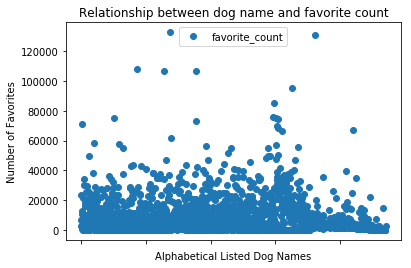

In [2023]:
# Plot looking for name & favorite_count correlation. (Insite 2)
ax = sorted_name_df.plot(x='name', y='favorite_count', title='Relationship between dog name and favorite count', style='o')
ax.set(xlabel='Alphabetical Listed Dog Names', ylabel='Number of Favorites');

#### Plot Findings
> There doesn't appear to be any correlation between what letter a dogs name starts with and how many favorites it recieved. The spread of the favorites is pretty balanced from dog names that start with A all the way to Z.

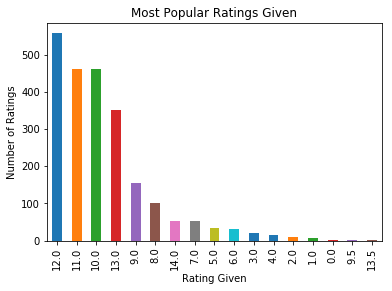

In [2024]:
# Plotting the most popular rating given. (Insite 3)
ax = clean_wrd.rating_numerator.value_counts().plot(kind='bar', title='Most Popular Ratings Given')
ax.set(xlabel='Rating Given', ylabel='Number of Ratings');

#### Plot Findings
> The majority of ratings that were given were 10/10, 11/10, 12/10, and 13/10. With the most popular rating being 12/10.